# Laboratorio 7: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: Ratas.py 🐁

- Nombre de alumno 1: Geraldyn Pérez
- Nombre de alumno 2: Diego Rojas

### **Link de repositorio de GitHub:** [Repositorio](https://github.com/Geral37/MDS7202.git)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.



### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

1. Los datos de entrenamiento, son aquellos que se usan para entrenar el modelo, mientras que los de validación son los que se usan para medir el rendimiento del modelo sin influir en el proceso de aprendizaje de este, dado que la medición se realiza con datos que no han sido vistos por el modelo.

2. El principal desafío es la ausencia de etiquetas, lo que dificulta definir y evaluar clases. Sin referencias conocidas, el modelo debe descubrir patrones por sí solo, lo que puede llevar a resultados poco interpretables o inexactos.

3. Es una tabla donde se muestra la cantidad de veces que el modelo clasificó ciertas variables según la etiqueta correspondiente, es decir, muestra cuántas veces las predicciones del modelo coinciden con las etiquetas reales y cuántas no.

4. Considerando:

*Verdadero positivo (TP):* Instancias positivas que fueron correctamente clasificadas.

*Verdadero negativo (TN):* Instancias negativas que fueron correctamente clasificadas.

*Falso positivo (FP):* Instancias negativas que fueron incorrectamente clasificadas como positivas.

*Falso negativo (FN):* Instancias positivas que fueron incorrectamente clasificadas negativas.

  * Accuracy: es la proporción del conjunto de prueba que está clasificado correctamente y se calcula como:

$$
\displaystyle \small accuracy = \frac{TP + TN}{TP + FP + TN + FN}
$$

  * Precision: es una medida de la exactitud, o el porcentaje de instancias clasificadas como positivas que realmente lo son y se calcula como:

$$
\displaystyle \small precision = \frac{TP}{TP + FP}
$$

  * Recall: es la proporción de instancias positivas que son clasificadas correctamente y se calcula como:
  
$$
\displaystyle \small recall = \frac{TP}{TP + FN}
$$

  * F1 score: es la combinación entre precision y recall en una solo medida. Esto otorga igual peso a la precisión y la exhaustividad y se calcula como:

$$
\displaystyle \small F_1 = \frac{2\times precision \times recall}{precision + recall}
$$

5.
  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera: En este caso, es crucial asegurar que se detecten la mayor cantidad de fallas posibles, con tal de evitar accidentes graves o interrupciones costosas, por lo que lo más adecuado sería utilizar recall.

  * Detección de enfermedades altamente contagiosas: En este caso, nos importa tener la menor cantidad de falsos negativos para controlar la propagación de la enfermedad, por lo que lo más adecuado sería utilizar recall.

  * Aprobación de créditos de alto riesgo: En este caso, nos importa minimizar los falsos positivos, , ya que otorgar un crédito a un solicitante de alto riesgo puede ser costoso para la entidad financiera, por lo que lo más adecuado sería utilizar precision.

  * Detección de crímenes: En este caso, necesitamos mantener un equilibrio entre no perder ningún crimen y no acusar erróneamente a inocentes, por lo que lo más adecuado sería utilizar F1 score.

6. La calibración de modelos es el proceso de ajustar las predicciones de un modelo para que las probabilidades que genera sean más confiables y reflejen la realidad. Esto es importante en modelos de clasificación probabilística, ya que permite que, por ejemplo, si un modelo indica una probabilidad del 70%, esa clase ocurra efectivamente el 70% de las veces. Una buena calibración mejora la interpretación de las predicciones y la toma de decisiones


# Parte práctica [48 puntos]

<p align="center">
  <img src="https://i.ibb.co/61L8z0w/renacin-by-volframio-dcirf4l-fullview.jpg"
" width="400">
</p>



Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [4]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


**Librerías necesarias**

In [1]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report,  brier_score_loss
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
df = pd.read_csv('stats_players.csv')
df.head()

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [3]:
#1. Genere los labels para la clasificación binaria en una variable llamada `label`.
df['label'] = df['National_Position'].notnull().astype(int)

#2. Ejemplos por cada clase
clases = df['label'].value_counts()
print(clases)

label
0    16513
1     1075
Name: count, dtype: int64


2. Se puede observar que hay 1.075 jugadores que son seleccionados para representar a su país y hay 16.513 jugadores que no lo son. Por lo que, solo aprox. el 6% corresponde a seleccionados.

In [4]:
df.dtypes

,0
Name,object
Nationality,object
National_Position,object
Club_Position,object
Height,int64
Weight,int64
Preffered_Foot,object
Age,int64
Work_Rate,object
Weak_foot,int64


In [5]:
variables_numericas = df.select_dtypes(include=['number']).columns.tolist()

variables_categoricas = df.select_dtypes(include=['object']).columns.tolist()

print("Variables numéricas:", variables_numericas)
print("Variables categóricas:", variables_categoricas)

Variables numéricas: ['Height', 'Weight', 'Age', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys', 'label']
Variables categóricas: ['Name', 'Nationality', 'National_Position', 'Club_Position', 'Preffered_Foot', 'Work_Rate']


In [6]:
variables_categoricas

['Name',
 'Nationality',
 'National_Position',
 'Club_Position',
 'Preffered_Foot',
 'Work_Rate']

In [7]:
#3. Genere un `ColumnTransformer`
variables_numericas1 = ['Height', 'Weight', 'Age', 'Weak_foot', 'Skill_Moves']

variables_numericas2 = ['Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle',
                        'Aggression', 'Reactions', 'Interceptions', 'Vision', 'Composure', 'Crossing',
                        'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength',
                        'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
                        'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys']

variables_categoricas = ['Preffered_Foot', 'Work_Rate']

col_transformer = ColumnTransformer(
    transformers=[
        ('num_minmax100', MinMaxScaler(feature_range=(0, 100)), variables_numericas2),  # MinMaxScaler para variables numéricas asociadas a estadísticas
        ('num_minmax', MinMaxScaler(), variables_numericas1),  # ahora para las otras
        ('cat', OneHotEncoder(handle_unknown='ignore'), variables_categoricas)  # OneHotEncoder para categóricas
    ]
)

print(col_transformer)

ColumnTransformer(transformers=[('num_minmax100',
                                 MinMaxScaler(feature_range=(0, 100)),
                                 ['Ball_Control', 'Dribbling', 'Marking',
                                  'Sliding_Tackle', 'Standing_Tackle',
                                  'Aggression', 'Reactions', 'Interceptions',
                                  'Vision', 'Composure', 'Crossing',
                                  'Short_Pass', 'Long_Pass', 'Acceleration',
                                  'Speed', 'Stamina', 'Strength', 'Balance',
                                  'Agility', 'Jumping', 'Heading', 'Shot_Power',
                                  'Finishing', 'Long_Shots', 'Curve',
                                  'Freekick_Accuracy', 'Penalties',
                                  'Volleys']),
                                ('num_minmax', MinMaxScaler(),
                                 ['Height', 'Weight', 'Age', 'Weak_foot',
                              

4.

Existe una gran cantidad de variables numéricas y algunas categóricas. Las numéricas pueden ser agrupadas en 2 conjuntos:

- Características del jugador
- Estadísticas de habilidades

El primer conjunto varía su dominio para cada variable, mientras que el segundo está acotado entre 0 y 100.

Así, se dividen las columnas en 3 grupos y se aplica una transformación distinta para cada uno. Al primer conjunto, dado que no tienen un dominio constante entre ellas, se les aplica MinMaxScaler, mientras que al segundo se le aplica MinMaxScaler pero de manera personalizada pero con el rango fijo entre 0 y 100, utilizando una función que considera que el máximo valor posible es 100.


### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [8]:
df.columns

Index(['Name', 'Nationality', 'National_Position', 'Club_Position', 'Height',
       'Weight', 'Preffered_Foot', 'Age', 'Work_Rate', 'Weak_foot',
       'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
       'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys', 'label'],
      dtype='object')

In [9]:
# 1

# Separar las características (X) y las etiquetas (y)
X = df.drop(columns=['label', 'Name', 'Nationality', 'National_Position'])
#X = df.drop(columns=['label'])
y = df['label']

# División de datos en entrenamiento y prueba, estratificando por la variable 'label'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33, stratify=y)

# Verificar la forma de los conjuntos
print("Conjunto de entrenamiento:", X_train.shape)
print("Conjunto de prueba:", X_test.shape)


Conjunto de entrenamiento: (12311, 36)
Conjunto de prueba: (5277, 36)


In [10]:
#2

# Pipeline para XGBoost
pipeline_xgboost = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', XGBClassifier(random_state=33))
])

# Pipeline para LightGBM
pipeline_lightgbm = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', LGBMClassifier(random_state=33))
])

In [11]:
# Entrenar el pipeline de XGBoost
pipeline_xgboost.fit(X_train, y_train)

# Entrenar el pipeline de LightGBM
pipeline_lightgbm.fit(X_train, y_train)

# Verificar la finalización del entrenamiento
print("Entrenamiento completado para ambos modelos.")

[LightGBM] [Info] Number of positive: 752, number of negative: 11559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2447
[LightGBM] [Info] Number of data points in the train set: 12311, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061084 -> initscore=-2.732483
[LightGBM] [Info] Start training from score -2.732483
Entrenamiento completado para ambos modelos.


### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [12]:
# Predicciones con XGBoost
y_pred_xgboost = pipeline_xgboost.predict(X_test)

# Predicciones con LightGBM
y_pred_lightgbm = pipeline_lightgbm.predict(X_test)

# Calcular las métricas para XGBoost
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
precision_xgboost = precision_score(y_test, y_pred_xgboost)
recall_xgboost = recall_score(y_test, y_pred_xgboost)

# Calcular las métricas para LightGBM
accuracy_lightgbm = accuracy_score(y_test, y_pred_lightgbm)
precision_lightgbm = precision_score(y_test, y_pred_lightgbm)
recall_lightgbm = recall_score(y_test, y_pred_lightgbm)

# Mostrar resultados
print(f"XGBoost - Accuracy: {accuracy_xgboost:.4f}, Precision: {precision_xgboost:.4f}, Recall: {recall_xgboost:.4f}")
print(f"LightGBM - Accuracy: {accuracy_lightgbm:.4f}, Precision: {precision_lightgbm:.4f}, Recall: {recall_lightgbm:.4f}")

XGBoost - Accuracy: 0.9369, Precision: 0.4457, Recall: 0.1269
LightGBM - Accuracy: 0.9399, Precision: 0.5417, Recall: 0.1207


In [13]:
# Generar el informe de clasificación para XGBoost
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgboost, target_names=['No Seleccionado', 'Seleccionado Nacional']))

# Generar el informe de clasificación para LightGBM
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lightgbm, target_names=['No Seleccionado', 'Seleccionado Nacional']))

XGBoost Classification Report:
                       precision    recall  f1-score   support

      No Seleccionado       0.95      0.99      0.97      4954
Seleccionado Nacional       0.45      0.13      0.20       323

             accuracy                           0.94      5277
            macro avg       0.70      0.56      0.58      5277
         weighted avg       0.92      0.94      0.92      5277

LightGBM Classification Report:
                       precision    recall  f1-score   support

      No Seleccionado       0.95      0.99      0.97      4954
Seleccionado Nacional       0.54      0.12      0.20       323

             accuracy                           0.94      5277
            macro avg       0.74      0.56      0.58      5277
         weighted avg       0.92      0.94      0.92      5277



2.  
En el caso de XGBoost, la precision es de 0.47, lo que significa que, de todas las predicciones de "Seleccionado Nacional", solo el 47% fueron correctas. Esto sugiere un alto número de falsos positivos, lo que indica que el modelo tiende a clasificar incorrectamente a jugadores que no son realmente seleccionados. El recall, con un valor de 0.12, indica que de todos los jugadores que realmente son "Seleccionados Nacionales", solo el 12% fue identificado correctamente. Este bajo valor implica que el modelo enfrenta dificultades significativas para detectar a los jugadores seleccionados, lo que puede ser problemático en un contexto donde es crucial identificar positivos. La F1-score de 0.20 refuerza la idea de que el modelo tiene un rendimiento deficiente al no lograr un equilibrio adecuado entre precisión y recall. Este análisis  es equivalente para el caso de LightGBM.

En ambos modelos hay 4954 ejemplos de la clase "No Seleccionado" y 323 ejemplos de la clase "Seleccionado Nacional". Esto muestra un desbalance significativo entre las dos clases, ya que la clase "Seleccionado Nacional" representa solo alrededor del 6% del total de ejemplos.

Ambos modelos presentan una accuracy de 0.94 (94%), lo que implica que, en general, el 94% de las predicciones son correctas. La alta accuracy se debe principalmente a la gran cantidad de ejemplos de la clase mayoritaria ("No Seleccionado"). Esto significa que, aunque los modelos están acertando la mayoría de las predicciones, este éxito se debe a que están clasificando correctamente la clase mayoritaria, mientras que las predicciones de la clase minoritaria son deficientes.

3.#
 En general LightGBM tiene mejor rendimiento. Entrega mejor Accuracy, acertando a gran cantidad de las etiquetas, y también mejor Precisión, entregando menos falsos positivos, pero ambos tienen bajo Recall, dejando fuera muchos positivos. La más adecuada sería recall (o precisión), para capturar la mayor cantidad de posibles seleccionados, ya que es mejor considerar a un jugador como seleccionado y al final que no sea considerado, por sobre dejar pasar la oportunidad de seleccionar a un buen jugador.

La más adecuada sería recall (o precisión), para capturar la mayor cantidad de posibles seleccionados, ya que es mejor considerar a un jugador como seleccionado y al final que no sea considerado, por sobre dejar pasar la oportunidad de seleccionar a un buen jugador. En general, LightGBM y XGBoost tienen rendimientos similares. LightGBM tiene mejor Precisión, entregando menos falsos positivos, por lo que este modelo tendría el mejor desempeño.

Quité la posición y cambió lo del recall. lo dejamos?

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [14]:
# Función para etiquetar las posiciones
def label_positions(position):
    if position in ['ST', 'CF']:
        return 'ataque'
    elif position in ['RW', 'CAM', 'LW']:
        return 'central_ataque'
    elif position in ['RM', 'CM', 'LM']:
        return 'central'
    elif position in ['RWB', 'CDM', 'LWB']:
        return 'central_defensa'
    elif position in ['RB', 'CB', 'LB']:
        return 'defensa'
    elif position == 'GK':
        return 'arquero'
    else:
        return None  # Excluimos las posiciones 'Sub' y 'Res'

df['label_pos'] = df['Club_Position'].apply(label_positions)

df = df[df['label_pos'].notna()]

class_counts = df['label_pos'].value_counts()
class_counts

,count
label_pos,
defensa,1180
central,907
arquero,632
central_ataque,581
ataque,430
central_defensa,209


In [15]:
df.columns

Index(['Name', 'Nationality', 'National_Position', 'Club_Position', 'Height',
       'Weight', 'Preffered_Foot', 'Age', 'Work_Rate', 'Weak_foot',
       'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
       'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys', 'label', 'label_pos'],
      dtype='object')

In [16]:
X = df.drop(columns=['Club_Position', 'label', 'label_pos'])
y = df['label_pos']

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Esto transformará las etiquetas a valores numéricos

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Definir el nuevo pipeline
pipeline_new = Pipeline(steps=[
    ('preprocessor', col_transformer),  # Reutilizamos el ColumnTransformer anterior
    ('classifier', SVC())  # Puedes cambiar a LightGBM si lo prefieres
])

# Entrenar el pipeline
pipeline_new.fit(X_train, y_train)

# Realizar predicciones
y_pred = pipeline_new.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Mostrar el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)

Accuracy: 0.7398
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       126
         ataque       0.77      0.86      0.81        86
        central       0.55      0.76      0.64       182
 central_ataque       0.61      0.12      0.20       116
central_defensa       0.00      0.00      0.00        42
        defensa       0.79      0.98      0.87       236

       accuracy                           0.74       788
      macro avg       0.62      0.62      0.59       788
   weighted avg       0.70      0.74      0.69       788



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 3.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [21]:
!pip install catboost
!pip install pycaret

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [22]:
df.columns

Index(['Name', 'Nationality', 'National_Position', 'Club_Position', 'Height',
       'Weight', 'Preffered_Foot', 'Age', 'Work_Rate', 'Weak_foot',
       'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
       'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys', 'label', 'label_pos'],
      dtype='object')

In [17]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

#Continuar código aquí

#df = df.drop(columns=['Club_Position'])  # o ya no

# Iniciar el entorno de PyCaret
clf = setup(data=df, target='label', session_id=7, fold_shuffle=True,
             ignore_features=['Name', 'Nationality', 'National_Position'])

model_comparison = compare_models(include=['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost'], sort='Precision')

best_model = model_comparison

evaluate_model(best_model)

,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 65)"
5,Transformed train set shape,"(2757, 65)"
6,Transformed test set shape,"(1182, 65)"
7,Ignore features,3
8,Numeric features,33
9,Categorical features,4


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9130,0.7987,0.1329,0.6831,0.2199,0.1950,0.2720,1.6190
rf,Random Forest Classifier,0.9137,0.8041,0.1645,0.6398,0.2589,0.2302,0.2923,0.8890
catboost,CatBoost Classifier,0.9140,0.8269,0.2151,0.6224,0.3132,0.2792,0.3272,6.6520
lightgbm,Light Gradient Boosting Machine,0.9104,0.7922,0.2109,0.5599,0.3022,0.2648,0.3030,2.3710
xgboost,Extreme Gradient Boosting,0.9068,0.7836,0.2066,0.5258,0.2888,0.2489,0.2841,0.5520
dt,Decision Tree Classifier,0.8629,0.6209,0.3238,0.2925,0.3043,0.2294,0.2311,0.1850


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

2.
* Arboles de decisión (dt):  es un modelo de aprendizaje supervisado que organiza los datos en una estructura de árbol, donde cada nodo corresponde a una característica del conjunto de datos y cada rama representa una decisión o regla basada en el valor de esa característica. El objetivo es dividir los datos de manera que se maximice la ganancia de información o se minimice la impureza (entropía o Gini). Este proceso continúa hasta que se alcanza un criterio de parada, como un número mínimo de muestras en un nodo o una máxima profundidad del árbol.

* Random Forest (rf): es un modelo que crea múltiples árboles de decisión en paralelo, cada árbol se entrena con un subconjunto aleatorio de los datos de entrenamiento, y en cada nodo, se selecciona aleatoriamente un subconjunto de características para determinar la mejor división. La predicción final del Random Forest se obtiene mediante el promedio (para regresión) o el voto mayoritario (para clasificación) de todos los árboles.

* Extra Tress (et): es un modelo similar a Random Forest, pero con una mayor aleatoriedad en el proceso de construcción de los árboles. Al igual que en Random Forest, se construyen múltiples árboles de decisión en paralelo utilizando subconjuntos aleatorios de los datos de entrenamiento. Sin embargo, la diferencia clave es que en lugar de buscar la mejor división en cada nodo, Extra Trees elige las divisiones de manera completamente aleatoria.

3.
- **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?

En base a lo entregado por el modelo, podemos calcular que la tasa de verdaderos positivos es aproximadamente 7.27%, mientras que la tasa de los verdaderos negativos es aproximadamente 99.91%. Esto indica que el modelo es muy bueno detectando correctamente los casos negativos (clase 0), pero que tiene dificultades para identificar correctamente los casos positivos (clase 1).

- **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?

Se puede ver que el umbral es de 0.24, por lo que el modelo tiene un desempeño peor que lanzar una moneda, por lo que no es el mejor.

- **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?

Reactions, Dribbling, Short_Pass, Ball_Control, Vísion, Composure, Crossing, Long_pass, Shot_Power y Stamina.

- **Learning Curve**: ¿El modelo presenta algún problema?

Se puede observar que la curva de Training Score es igual a 1, por lo que se puede sugerir que hay sobreajuste en el modelo.

### 3.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

Entrenar con todas las disponibles despues de creadas? o disponibles desde el comienzo?

In [18]:
# Iniciar el entorno de PyCaret
clf = setup(data=df, target='label', session_id=7, fold_shuffle=True,
             ignore_features=['Name', 'Nationality', 'National_Position'])

xgb_model = create_model('xgboost')

evaluate_model(xgb_model)

,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 65)"
5,Transformed train set shape,"(2757, 65)"
6,Transformed test set shape,"(1182, 65)"
7,Ignore features,3
8,Numeric features,33
9,Categorical features,4


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9130,0.8153,0.3200,0.5333,0.4000,0.3563,0.3698
1,0.9239,0.8077,0.2308,0.8571,0.3636,0.3371,0.4213
2,0.9058,0.7669,0.1538,0.5000,0.2353,0.1998,0.2400
3,0.9130,0.7992,0.3462,0.5625,0.4286,0.3844,0.3977
4,0.9130,0.8146,0.1923,0.6250,0.2941,0.2614,0.3139
5,0.9022,0.7438,0.1923,0.4545,0.2703,0.2270,0.2513
6,0.9203,0.8006,0.2308,0.7500,0.3529,0.3229,0.3879
7,0.8836,0.8046,0.2000,0.2941,0.2381,0.1776,0.1814
8,0.9091,0.7634,0.1200,0.5000,0.1935,0.1641,0.2125


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [19]:
X_train = get_config('X_train')  # Obtener el conjunto de entrenamiento
feature_names = X_train.columns.tolist()  # Nombres de las características
importance_values = xgb_model.feature_importances_  # Importancia de las características

print(f'Longitud de características: {len(feature_names)}')
print(f'Longitud de importancias: {len(importance_values)}')

if len(feature_names) != len(importance_values):
    print("Longitudes no coinciden. Comparando las listas:")
    print("Características:", feature_names)
    print("Importancias:", importance_values)

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_values[:len(feature_names)]  # Alinear
})

feature_importance = feature_importance[feature_importance['Importance'] > 0]
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

feature_importance

Longitud de características: 37
Longitud de importancias: 64
Longitudes no coinciden. Comparando las listas:
Características: ['Club_Position', 'Height', 'Weight', 'Preffered_Foot', 'Age', 'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys', 'label_pos']
Importancias: [0.         0.010302   0.00885079 0.         0.         0.01524809
 0.         0.01448886 0.00318253 0.         0.01298278 0.
 0.         0.         0.         0.02141181 0.01807959 0.01844441
 0.02781842 0.01127954 0.01850824 0.         0.         0.02442102
 0.04389    0.0050773  0.         0.         0.01559238 0.02976951
 0.02636902 0.03387395 0.02274314 0.01333847 0

,Feature,Importance
36,label_pos,0.124333
24,Strength,0.043890
31,Long_Shots,0.033874
29,Shot_Power,0.029770
18,Crossing,0.027818
30,Finishing,0.026369
23,Stamina,0.024421
32,Curve,0.022743
34,Penalties,0.021674
15,Interceptions,0.021412


In [20]:
y_train = get_config('y')  # Obtener la variable objetivo
non=['Name', 'Nationality', 'National_Position']
# Inicializar la lista de características
feature_names = X_train.columns.tolist()
N = 1
# Búsqueda recursiva de eliminación de características
while len(feature_names) > N:
    # Obtener la importancia de las características
    importance_values = xgb_model.feature_importances_

    # Crear un DataFrame de importancia de características
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance_values[:len(feature_names)]
    })

    # Filtrar las características menos importantes
    feature_importance = feature_importance.sort_values(by='Importance')
    least_important_feature = feature_importance.iloc[0]['Feature']  # Obtener la característica menos importante

    # Eliminar la característica menos importante del conjunto de características
    feature_names.remove(least_important_feature)
    print(f'Eliminando característica: {least_important_feature}')
    non.append(least_important_feature)

    # Reentrenar el modelo con el nuevo conjunto de características
    clf = setup(data=df, target='label', session_id=7, fold_shuffle=True,
             ignore_features=non)

    xgb_model = create_model('xgboost')

    # Evaluar el rendimiento del modelo
    evaluate_model(xgb_model)

importance_values = xgb_model.feature_importances_
feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance_values[:len(feature_names)]
})
feature_importance

Eliminando característica: Club_Position


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 50)"
5,Transformed train set shape,"(2757, 50)"
6,Transformed test set shape,"(1182, 50)"
7,Ignore features,4
8,Numeric features,33
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9058,0.8316,0.3200,0.4706,0.3810,0.3320,0.3392
1,0.9275,0.8383,0.3077,0.8000,0.4444,0.4138,0.4685
2,0.9203,0.7968,0.2692,0.7000,0.3889,0.3551,0.4021
3,0.9094,0.7786,0.3846,0.5263,0.4444,0.3964,0.4022
4,0.9167,0.8426,0.2308,0.6667,0.3429,0.3094,0.3598
5,0.9094,0.7522,0.1923,0.5556,0.2857,0.2493,0.2900
6,0.9167,0.7977,0.1923,0.7143,0.3030,0.2740,0.3424
7,0.8982,0.7835,0.2800,0.4118,0.3333,0.2804,0.2865
8,0.9127,0.7848,0.1600,0.5714,0.2500,0.2189,0.2701


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Standing_Tackle


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 49)"
5,Transformed train set shape,"(2757, 49)"
6,Transformed test set shape,"(1182, 49)"
7,Ignore features,5
8,Numeric features,32
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9022,0.8293,0.2800,0.4375,0.3415,0.2914,0.2999
1,0.9167,0.8112,0.1923,0.7143,0.3030,0.2740,0.3424
2,0.9167,0.7872,0.2308,0.6667,0.3429,0.3094,0.3598
3,0.9094,0.8040,0.3077,0.5333,0.3902,0.3451,0.3604
4,0.9094,0.8294,0.1923,0.5556,0.2857,0.2493,0.2900
5,0.9058,0.7763,0.2692,0.5000,0.3500,0.3041,0.3211
6,0.9203,0.8017,0.1923,0.8333,0.3125,0.2873,0.3772
7,0.8873,0.7997,0.2800,0.3500,0.3111,0.2505,0.2524
8,0.9091,0.7818,0.1600,0.5000,0.2424,0.2075,0.2463


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Reactions


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 48)"
5,Transformed train set shape,"(2757, 48)"
6,Transformed test set shape,"(1182, 48)"
7,Ignore features,6
8,Numeric features,31
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8949,0.8512,0.3200,0.4000,0.3556,0.2991,0.3013
1,0.9167,0.7863,0.2692,0.6364,0.3784,0.3415,0.3781
2,0.9130,0.7762,0.1154,0.7500,0.2000,0.1794,0.2722
3,0.9058,0.7880,0.3077,0.5000,0.3810,0.3331,0.3446
4,0.8986,0.8374,0.1538,0.4000,0.2222,0.1793,0.2030
5,0.9094,0.7446,0.1923,0.5556,0.2857,0.2493,0.2900
6,0.9384,0.7778,0.3462,1.0000,0.5143,0.4896,0.5693
7,0.8909,0.7651,0.1600,0.3077,0.2105,0.1582,0.1680
8,0.9055,0.7491,0.1600,0.4444,0.2353,0.1966,0.2262


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Aggression


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 47)"
5,Transformed train set shape,"(2757, 47)"
6,Transformed test set shape,"(1182, 47)"
7,Ignore features,7
8,Numeric features,30
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.8284,0.3600,0.5625,0.4390,0.3963,0.4079
1,0.9094,0.7602,0.2308,0.5455,0.3243,0.2842,0.3147
2,0.9058,0.7805,0.0769,0.5000,0.1333,0.1110,0.1685
3,0.9022,0.7712,0.2308,0.4615,0.3077,0.2613,0.2796
4,0.9094,0.8342,0.1538,0.5714,0.2424,0.2109,0.2635
5,0.8913,0.7574,0.1538,0.3333,0.2105,0.1606,0.1745
6,0.9239,0.7837,0.1923,1.0000,0.3226,0.3014,0.4212
7,0.8945,0.7978,0.1600,0.3333,0.2162,0.1671,0.1801
8,0.8982,0.7270,0.1600,0.3636,0.2222,0.1765,0.1936


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Interceptions


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 46)"
5,Transformed train set shape,"(2757, 46)"
6,Transformed test set shape,"(1182, 46)"
7,Ignore features,8
8,Numeric features,29
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8949,0.8198,0.3600,0.4091,0.3830,0.3258,0.3266
1,0.9167,0.7854,0.2692,0.6364,0.3784,0.3415,0.3781
2,0.9058,0.8085,0.1154,0.5000,0.1875,0.1577,0.2071
3,0.9058,0.7780,0.2692,0.5000,0.3500,0.3041,0.3211
4,0.8986,0.8462,0.1538,0.4000,0.2222,0.1793,0.2030
5,0.8949,0.7726,0.1538,0.3636,0.2162,0.1697,0.1879
6,0.9239,0.7637,0.2308,0.8571,0.3636,0.3371,0.4213
7,0.9018,0.7878,0.2400,0.4286,0.3077,0.2594,0.2720
8,0.8945,0.7606,0.1600,0.3333,0.2162,0.1671,0.1801


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Skill_Moves


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 45)"
5,Transformed train set shape,"(2757, 45)"
6,Transformed test set shape,"(1182, 45)"
7,Ignore features,9
8,Numeric features,28
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8986,0.8260,0.2800,0.4118,0.3333,0.2806,0.2867
1,0.9239,0.7908,0.3077,0.7273,0.4324,0.3988,0.4415
2,0.9022,0.7809,0.0769,0.4000,0.1290,0.1017,0.1422
3,0.9058,0.7743,0.2308,0.5000,0.3158,0.2725,0.2962
4,0.9022,0.8515,0.1923,0.4545,0.2703,0.2270,0.2513
5,0.9022,0.7563,0.1923,0.4545,0.2703,0.2270,0.2513
6,0.9203,0.7878,0.2308,0.7500,0.3529,0.3229,0.3879
7,0.9055,0.7875,0.2000,0.4545,0.2778,0.2353,0.2582
8,0.9018,0.7539,0.1200,0.3750,0.1818,0.1441,0.1711


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Crossing


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 44)"
5,Transformed train set shape,"(2757, 44)"
6,Transformed test set shape,"(1182, 44)"
7,Ignore features,10
8,Numeric features,27
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9130,0.8429,0.4000,0.5263,0.4545,0.4083,0.4128
1,0.9130,0.7982,0.2308,0.6000,0.3333,0.2965,0.3357
2,0.9094,0.8069,0.1154,0.6000,0.1935,0.1683,0.2352
3,0.9022,0.7957,0.2308,0.4615,0.3077,0.2613,0.2796
4,0.9094,0.8460,0.1923,0.5556,0.2857,0.2493,0.2900
5,0.8913,0.7442,0.1154,0.3000,0.1667,0.1206,0.1366
6,0.9130,0.7542,0.1538,0.6667,0.2500,0.2225,0.2921
7,0.9127,0.7707,0.2400,0.5455,0.3333,0.2941,0.3227
8,0.9055,0.7571,0.1600,0.4444,0.2353,0.1966,0.2262


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Ball_Control


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 43)"
5,Transformed train set shape,"(2757, 43)"
6,Transformed test set shape,"(1182, 43)"
7,Ignore features,11
8,Numeric features,26
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9130,0.8551,0.3600,0.5294,0.4286,0.3834,0.3917
1,0.9130,0.8169,0.2308,0.6000,0.3333,0.2965,0.3357
2,0.8949,0.8348,0.0769,0.2857,0.1212,0.0846,0.1058
3,0.9094,0.7920,0.2692,0.5385,0.3590,0.3160,0.3381
4,0.9094,0.8688,0.2308,0.5455,0.3243,0.2842,0.3147
5,0.8877,0.7518,0.1923,0.3333,0.2439,0.1879,0.1963
6,0.9167,0.7663,0.1923,0.7143,0.3030,0.2740,0.3424
7,0.8945,0.7797,0.1600,0.3333,0.2162,0.1671,0.1801
8,0.9091,0.7427,0.1600,0.5000,0.2424,0.2075,0.2463


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Short_Pass


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 42)"
5,Transformed train set shape,"(2757, 42)"
6,Transformed test set shape,"(1182, 42)"
7,Ignore features,12
8,Numeric features,25
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9130,0.8139,0.3600,0.5294,0.4286,0.3834,0.3917
1,0.9239,0.8017,0.3077,0.7273,0.4324,0.3988,0.4415
2,0.9022,0.7649,0.0385,0.3333,0.0690,0.0505,0.0858
3,0.9022,0.7577,0.2308,0.4615,0.3077,0.2613,0.2796
4,0.9058,0.8485,0.1923,0.5000,0.2778,0.2379,0.2694
5,0.8949,0.7408,0.1538,0.3636,0.2162,0.1697,0.1879
6,0.9203,0.7943,0.2308,0.7500,0.3529,0.3229,0.3879
7,0.8945,0.7410,0.2000,0.3571,0.2564,0.2045,0.2145
8,0.9018,0.7490,0.1600,0.4000,0.2286,0.1863,0.2089


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Dribbling


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 41)"
5,Transformed train set shape,"(2757, 41)"
6,Transformed test set shape,"(1182, 41)"
7,Ignore features,13
8,Numeric features,24
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8804,0.8147,0.1200,0.2143,0.1538,0.0950,0.0996
1,0.9130,0.7669,0.2308,0.6000,0.3333,0.2965,0.3357
2,0.8986,0.8342,0.0385,0.2500,0.0667,0.0426,0.0647
3,0.9058,0.7754,0.1923,0.5000,0.2778,0.2379,0.2694
4,0.9058,0.8522,0.1538,0.5000,0.2353,0.1998,0.2400
5,0.9022,0.7283,0.1154,0.4286,0.1818,0.1478,0.1847
6,0.9167,0.7798,0.2308,0.6667,0.3429,0.3094,0.3598
7,0.8836,0.7421,0.0800,0.1818,0.1111,0.0588,0.0645
8,0.9055,0.7661,0.0800,0.4000,0.1333,0.1063,0.1463


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Speed


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 40)"
5,Transformed train set shape,"(2757, 40)"
6,Transformed test set shape,"(1182, 40)"
7,Ignore features,14
8,Numeric features,23
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8949,0.7981,0.2400,0.3750,0.2927,0.2389,0.2458
1,0.9094,0.7778,0.2308,0.5455,0.3243,0.2842,0.3147
2,0.8877,0.8020,0.0385,0.1429,0.0606,0.0215,0.0269
3,0.9094,0.7891,0.1923,0.5556,0.2857,0.2493,0.2900
4,0.9022,0.8397,0.1154,0.4286,0.1818,0.1478,0.1847
5,0.8986,0.7209,0.1923,0.4167,0.2632,0.2165,0.2354
6,0.9167,0.7802,0.1923,0.7143,0.3030,0.2740,0.3424
7,0.8945,0.7762,0.1200,0.3000,0.1714,0.1260,0.1413
8,0.9055,0.7646,0.1600,0.4444,0.2353,0.1966,0.2262


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Stamina


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 39)"
5,Transformed train set shape,"(2757, 39)"
6,Transformed test set shape,"(1182, 39)"
7,Ignore features,15
8,Numeric features,22
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9130,0.8271,0.2400,0.5455,0.3333,0.2943,0.3229
1,0.9275,0.8232,0.3846,0.7143,0.5000,0.4647,0.4907
2,0.8986,0.8098,0.0769,0.3333,0.1250,0.0930,0.1220
3,0.9058,0.7858,0.1923,0.5000,0.2778,0.2379,0.2694
4,0.9058,0.8540,0.1923,0.5000,0.2778,0.2379,0.2694
5,0.8841,0.7378,0.1154,0.2500,0.1579,0.1046,0.1137
6,0.9094,0.7758,0.1538,0.5714,0.2424,0.2109,0.2635
7,0.9018,0.7789,0.1600,0.4000,0.2286,0.1863,0.2089
8,0.9091,0.7765,0.1200,0.5000,0.1935,0.1641,0.2125


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Strength


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 38)"
5,Transformed train set shape,"(2757, 38)"
6,Transformed test set shape,"(1182, 38)"
7,Ignore features,16
8,Numeric features,21
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9130,0.8234,0.2800,0.5385,0.3684,0.3267,0.3469
1,0.9203,0.7986,0.2308,0.7500,0.3529,0.3229,0.3879
2,0.9022,0.8143,0.1538,0.4444,0.2286,0.1893,0.2201
3,0.9022,0.7908,0.1538,0.4444,0.2286,0.1893,0.2201
4,0.9022,0.8329,0.1923,0.4545,0.2703,0.2270,0.2513
5,0.8949,0.7265,0.1154,0.3333,0.1714,0.1292,0.1503
6,0.9058,0.7862,0.1538,0.5000,0.2353,0.1998,0.2400
7,0.8945,0.7805,0.1600,0.3333,0.2162,0.1671,0.1801
8,0.9055,0.7530,0.1200,0.4286,0.1875,0.1538,0.1898


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Acceleration


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 37)"
5,Transformed train set shape,"(2757, 37)"
6,Transformed test set shape,"(1182, 37)"
7,Ignore features,17
8,Numeric features,20
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9058,0.8143,0.1600,0.4444,0.2353,0.1968,0.2264
1,0.9094,0.8137,0.1923,0.5556,0.2857,0.2493,0.2900
2,0.8841,0.7503,0.0385,0.1250,0.0588,0.0152,0.0182
3,0.9094,0.7477,0.1923,0.5556,0.2857,0.2493,0.2900
4,0.9058,0.8105,0.1923,0.5000,0.2778,0.2379,0.2694
5,0.8986,0.7278,0.1154,0.3750,0.1765,0.1383,0.1661
6,0.9094,0.8011,0.2308,0.5455,0.3243,0.2842,0.3147
7,0.8909,0.7664,0.2000,0.3333,0.2500,0.1951,0.2025
8,0.9055,0.7854,0.1200,0.4286,0.1875,0.1538,0.1898


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Balance


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 36)"
5,Transformed train set shape,"(2757, 36)"
6,Transformed test set shape,"(1182, 36)"
7,Ignore features,18
8,Numeric features,19
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9094,0.8233,0.2400,0.5000,0.3243,0.2821,0.3041
1,0.9239,0.8146,0.3077,0.7273,0.4324,0.3988,0.4415
2,0.8913,0.7945,0.0769,0.2500,0.1176,0.0767,0.0921
3,0.9058,0.7775,0.1538,0.5000,0.2353,0.1998,0.2400
4,0.9094,0.8151,0.1923,0.5556,0.2857,0.2493,0.2900
5,0.8986,0.7506,0.1154,0.3750,0.1765,0.1383,0.1661
6,0.9130,0.8112,0.1538,0.6667,0.2500,0.2225,0.2921
7,0.8945,0.7445,0.1600,0.3333,0.2162,0.1671,0.1801
8,0.8982,0.8078,0.1200,0.3333,0.1765,0.1348,0.1551


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Jumping


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 35)"
5,Transformed train set shape,"(2757, 35)"
6,Transformed test set shape,"(1182, 35)"
7,Ignore features,19
8,Numeric features,18
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8986,0.8089,0.2400,0.4000,0.3000,0.2490,0.2584
1,0.9167,0.7855,0.2308,0.6667,0.3429,0.3094,0.3598
2,0.8986,0.7974,0.0769,0.3333,0.1250,0.0930,0.1220
3,0.8986,0.7546,0.1923,0.4167,0.2632,0.2165,0.2354
4,0.9022,0.7817,0.1923,0.4545,0.2703,0.2270,0.2513
5,0.8986,0.7518,0.1154,0.3750,0.1765,0.1383,0.1661
6,0.9058,0.8077,0.2308,0.5000,0.3158,0.2725,0.2962
7,0.8909,0.7800,0.1600,0.3077,0.2105,0.1582,0.1680
8,0.9055,0.7883,0.1200,0.4286,0.1875,0.1538,0.1898


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Heading


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 34)"
5,Transformed train set shape,"(2757, 34)"
6,Transformed test set shape,"(1182, 34)"
7,Ignore features,20
8,Numeric features,17
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8841,0.8158,0.1600,0.2667,0.2000,0.1417,0.1471
1,0.9167,0.7942,0.2692,0.6364,0.3784,0.3415,0.3781
2,0.8913,0.7823,0.1538,0.3333,0.2105,0.1606,0.1745
3,0.9058,0.7722,0.1538,0.5000,0.2353,0.1998,0.2400
4,0.8986,0.7880,0.1923,0.4167,0.2632,0.2165,0.2354
5,0.8986,0.7362,0.1154,0.3750,0.1765,0.1383,0.1661
6,0.8877,0.8037,0.1538,0.3077,0.2051,0.1519,0.1625
7,0.8909,0.7822,0.1600,0.3077,0.2105,0.1582,0.1680
8,0.9055,0.8010,0.2000,0.4545,0.2778,0.2353,0.2582


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Sliding_Tackle


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 33)"
5,Transformed train set shape,"(2757, 33)"
6,Transformed test set shape,"(1182, 33)"
7,Ignore features,21
8,Numeric features,16
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9022,0.8140,0.2800,0.4375,0.3415,0.2914,0.2999
1,0.9130,0.7942,0.2692,0.5833,0.3684,0.3285,0.3570
2,0.8913,0.7946,0.0769,0.2500,0.1176,0.0767,0.0921
3,0.8877,0.7712,0.1154,0.2727,0.1622,0.1124,0.1245
4,0.8949,0.7994,0.2308,0.4000,0.2927,0.2403,0.2510
5,0.8841,0.7329,0.1154,0.2500,0.1579,0.1046,0.1137
6,0.9167,0.7945,0.1923,0.7143,0.3030,0.2740,0.3424
7,0.8945,0.7694,0.1600,0.3333,0.2162,0.1671,0.1801
8,0.9091,0.7754,0.1600,0.5000,0.2424,0.2075,0.2463


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Vision


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 32)"
5,Transformed train set shape,"(2757, 32)"
6,Transformed test set shape,"(1182, 32)"
7,Ignore features,22
8,Numeric features,15
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9058,0.8222,0.1600,0.4444,0.2353,0.1968,0.2264
1,0.9094,0.7925,0.1538,0.5714,0.2424,0.2109,0.2635
2,0.9022,0.7428,0.1538,0.4444,0.2286,0.1893,0.2201
3,0.8949,0.7640,0.1538,0.3636,0.2162,0.1697,0.1879
4,0.9058,0.7682,0.1923,0.5000,0.2778,0.2379,0.2694
5,0.8949,0.7377,0.0769,0.2857,0.1212,0.0846,0.1058
6,0.8986,0.8028,0.1154,0.3750,0.1765,0.1383,0.1661
7,0.8945,0.7888,0.2000,0.3571,0.2564,0.2045,0.2145
8,0.9018,0.7595,0.1200,0.3750,0.1818,0.1441,0.1711


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Long_Shots


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 31)"
5,Transformed train set shape,"(2757, 31)"
6,Transformed test set shape,"(1182, 31)"
7,Ignore features,23
8,Numeric features,14
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8986,0.8086,0.1600,0.3636,0.2222,0.1766,0.1938
1,0.9022,0.7952,0.1154,0.4286,0.1818,0.1478,0.1847
2,0.8877,0.7369,0.1154,0.2727,0.1622,0.1124,0.1245
3,0.9058,0.8052,0.1538,0.5000,0.2353,0.1998,0.2400
4,0.9022,0.7806,0.1923,0.4545,0.2703,0.2270,0.2513
5,0.8841,0.7243,0.1154,0.2500,0.1579,0.1046,0.1137
6,0.8986,0.8146,0.1154,0.3750,0.1765,0.1383,0.1661
7,0.9055,0.7965,0.2800,0.4667,0.3500,0.3024,0.3139
8,0.9127,0.7638,0.1600,0.5714,0.2500,0.2189,0.2701


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Curve


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 30)"
5,Transformed train set shape,"(2757, 30)"
6,Transformed test set shape,"(1182, 30)"
7,Ignore features,24
8,Numeric features,13
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8986,0.7735,0.1600,0.3636,0.2222,0.1766,0.1938
1,0.8913,0.8348,0.1154,0.3000,0.1667,0.1206,0.1366
2,0.8913,0.7552,0.1154,0.3000,0.1667,0.1206,0.1366
3,0.9022,0.7855,0.2308,0.4615,0.3077,0.2613,0.2796
4,0.9058,0.7725,0.1538,0.5000,0.2353,0.1998,0.2400
5,0.8804,0.7688,0.1154,0.2308,0.1538,0.0971,0.1039
6,0.9094,0.8243,0.1538,0.5714,0.2424,0.2109,0.2635
7,0.8945,0.8205,0.2000,0.3571,0.2564,0.2045,0.2145
8,0.9091,0.7568,0.1200,0.5000,0.1935,0.1641,0.2125


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Composure


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 29)"
5,Transformed train set shape,"(2757, 29)"
6,Transformed test set shape,"(1182, 29)"
7,Ignore features,25
8,Numeric features,12
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8949,0.7960,0.1600,0.3333,0.2162,0.1673,0.1803
1,0.9058,0.7963,0.1154,0.5000,0.1875,0.1577,0.2071
2,0.9058,0.7574,0.1538,0.5000,0.2353,0.1998,0.2400
3,0.8949,0.7695,0.1154,0.3333,0.1714,0.1292,0.1503
4,0.8949,0.7560,0.1538,0.3636,0.2162,0.1697,0.1879
5,0.8804,0.6963,0.0769,0.1818,0.1081,0.0552,0.0611
6,0.9058,0.8023,0.1923,0.5000,0.2778,0.2379,0.2694
7,0.9055,0.8058,0.1600,0.4444,0.2353,0.1966,0.2262
8,0.9091,0.7843,0.2000,0.5000,0.2857,0.2466,0.2764


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Long_Pass


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 28)"
5,Transformed train set shape,"(2757, 28)"
6,Transformed test set shape,"(1182, 28)"
7,Ignore features,26
8,Numeric features,11
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8986,0.8139,0.1600,0.3636,0.2222,0.1766,0.1938
1,0.8913,0.7831,0.0769,0.2500,0.1176,0.0767,0.0921
2,0.8913,0.7325,0.0769,0.2500,0.1176,0.0767,0.0921
3,0.9094,0.8194,0.1538,0.5714,0.2424,0.2109,0.2635
4,0.8841,0.7329,0.1538,0.2857,0.2000,0.1435,0.1516
5,0.8841,0.7283,0.0769,0.2000,0.1111,0.0620,0.0702
6,0.9022,0.7811,0.0769,0.4000,0.1290,0.1017,0.1422
7,0.9091,0.7949,0.1600,0.5000,0.2424,0.2075,0.2463
8,0.9055,0.7227,0.1600,0.4444,0.2353,0.1966,0.2262


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Agility


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 27)"
5,Transformed train set shape,"(2757, 27)"
6,Transformed test set shape,"(1182, 27)"
7,Ignore features,27
8,Numeric features,10
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8841,0.7624,0.1200,0.2308,0.1579,0.1023,0.1086
1,0.8949,0.8140,0.0769,0.2857,0.1212,0.0846,0.1058
2,0.8949,0.6723,0.0385,0.2000,0.0645,0.0352,0.0492
3,0.9058,0.7792,0.1538,0.5000,0.2353,0.1998,0.2400
4,0.8623,0.7282,0.0769,0.1250,0.0952,0.0253,0.0262
5,0.8732,0.6765,0.0385,0.0909,0.0541,-0.0021,-0.0023
6,0.9058,0.7457,0.1154,0.5000,0.1875,0.1577,0.2071
7,0.8982,0.7934,0.0800,0.2857,0.1250,0.0888,0.1095
8,0.8945,0.7080,0.1200,0.3000,0.1714,0.1260,0.1413


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Shot_Power


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 26)"
5,Transformed train set shape,"(2757, 26)"
6,Transformed test set shape,"(1182, 26)"
7,Ignore features,28
8,Numeric features,9
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9058,0.7552,0.2000,0.4545,0.2778,0.2355,0.2584
1,0.9022,0.8354,0.1154,0.4286,0.1818,0.1478,0.1847
2,0.8949,0.7057,0.0385,0.2000,0.0645,0.0352,0.0492
3,0.8986,0.7595,0.0769,0.3333,0.1250,0.0930,0.1220
4,0.8877,0.7731,0.1154,0.2727,0.1622,0.1124,0.1245
5,0.8768,0.6834,0.0385,0.1000,0.0556,0.0034,0.0038
6,0.8913,0.7425,0.0769,0.2500,0.1176,0.0767,0.0921
7,0.9055,0.7824,0.1600,0.4444,0.2353,0.1966,0.2262
8,0.8945,0.7109,0.0400,0.1667,0.0645,0.0304,0.0394


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Finishing


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 25)"
5,Transformed train set shape,"(2757, 25)"
6,Transformed test set shape,"(1182, 25)"
7,Ignore features,29
8,Numeric features,8
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8986,0.7560,0.1600,0.3636,0.2222,0.1766,0.1938
1,0.8986,0.8152,0.1154,0.3750,0.1765,0.1383,0.1661
2,0.8986,0.7132,0.1154,0.3750,0.1765,0.1383,0.1661
3,0.9022,0.7669,0.0385,0.3333,0.0690,0.0505,0.0858
4,0.8949,0.7749,0.1154,0.3333,0.1714,0.1292,0.1503
5,0.8913,0.6660,0.1538,0.3333,0.2105,0.1606,0.1745
6,0.8877,0.7111,0.1154,0.2727,0.1622,0.1124,0.1245
7,0.9055,0.7592,0.2000,0.4545,0.2778,0.2353,0.2582
8,0.9018,0.6720,0.0800,0.3333,0.1290,0.0973,0.1259


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Freekick_Accuracy


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 24)"
5,Transformed train set shape,"(2757, 24)"
6,Transformed test set shape,"(1182, 24)"
7,Ignore features,30
8,Numeric features,7
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8877,0.7241,0.1600,0.2857,0.2051,0.1498,0.1572
1,0.9094,0.8368,0.1538,0.5714,0.2424,0.2109,0.2635
2,0.8986,0.6652,0.0769,0.3333,0.1250,0.0930,0.1220
3,0.9058,0.7952,0.1538,0.5000,0.2353,0.1998,0.2400
4,0.8986,0.7348,0.1538,0.4000,0.2222,0.1793,0.2030
5,0.8768,0.6952,0.1538,0.2500,0.1905,0.1279,0.1323
6,0.9058,0.7629,0.1923,0.5000,0.2778,0.2379,0.2694
7,0.9055,0.7806,0.2000,0.4545,0.2778,0.2353,0.2582
8,0.8873,0.7118,0.0400,0.1250,0.0606,0.0173,0.0205


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Penalties


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 23)"
5,Transformed train set shape,"(2757, 23)"
6,Transformed test set shape,"(1182, 23)"
7,Ignore features,31
8,Numeric features,6
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9058,0.7584,0.1600,0.4444,0.2353,0.1968,0.2264
1,0.8986,0.8449,0.1538,0.4000,0.2222,0.1793,0.2030
2,0.8877,0.6792,0.0385,0.1429,0.0606,0.0215,0.0269
3,0.8913,0.7462,0.1538,0.3333,0.2105,0.1606,0.1745
4,0.8768,0.6895,0.0769,0.1667,0.1053,0.0487,0.0529
5,0.8841,0.6955,0.0769,0.2000,0.1111,0.0620,0.0702
6,0.9022,0.7643,0.2308,0.4615,0.3077,0.2613,0.2796
7,0.8982,0.7562,0.3200,0.4211,0.3636,0.3094,0.3129
8,0.8982,0.6706,0.0800,0.2857,0.1250,0.0888,0.1095


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Volleys


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 22)"
5,Transformed train set shape,"(2757, 22)"
6,Transformed test set shape,"(1182, 22)"
7,Ignore features,32
8,Numeric features,5
9,Categorical features,3


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9022,0.7304,0.0800,0.3333,0.1290,0.0974,0.1261
1,0.9022,0.7418,0.1538,0.4444,0.2286,0.1893,0.2201
2,0.8986,0.6622,0.0385,0.2500,0.0667,0.0426,0.0647
3,0.8913,0.6928,0.0385,0.1667,0.0625,0.0282,0.0370
4,0.8841,0.5700,0.0385,0.1250,0.0588,0.0152,0.0182
5,0.9022,0.6285,0.1154,0.4286,0.1818,0.1478,0.1847
6,0.8913,0.7371,0.1154,0.3000,0.1667,0.1206,0.1366
7,0.9018,0.6446,0.1600,0.4000,0.2286,0.1863,0.2089
8,0.8764,0.5843,0.0000,0.0000,0.0000,-0.0506,-0.0582


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: label_pos


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 16)"
5,Transformed train set shape,"(2757, 16)"
6,Transformed test set shape,"(1182, 16)"
7,Ignore features,33
8,Numeric features,5
9,Categorical features,2


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8913,0.6746,0.1200,0.2727,0.1667,0.1178,0.1293
1,0.8913,0.7174,0.1154,0.3000,0.1667,0.1206,0.1366
2,0.9022,0.5798,0.0385,0.3333,0.0690,0.0505,0.0858
3,0.8877,0.6252,0.0385,0.1429,0.0606,0.0215,0.0269
4,0.8913,0.5272,0.0385,0.1667,0.0625,0.0282,0.0370
5,0.8913,0.6049,0.1154,0.3000,0.1667,0.1206,0.1366
6,0.9058,0.7145,0.0769,0.5000,0.1333,0.1110,0.1685
7,0.8945,0.6166,0.1200,0.3000,0.1714,0.1260,0.1413
8,0.8727,0.5402,0.0000,0.0000,0.0000,-0.0548,-0.0614


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Marking


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 15)"
5,Transformed train set shape,"(2757, 15)"
6,Transformed test set shape,"(1182, 15)"
7,Ignore features,34
8,Numeric features,4
9,Categorical features,2


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8949,0.6037,0.1200,0.3000,0.1714,0.1262,0.1415
1,0.9058,0.6949,0.1154,0.5000,0.1875,0.1577,0.2071
2,0.9022,0.5063,0.0385,0.3333,0.0690,0.0505,0.0858
3,0.8913,0.6062,0.0385,0.1667,0.0625,0.0282,0.0370
4,0.8877,0.5385,0.0385,0.1429,0.0606,0.0215,0.0269
5,0.8986,0.6340,0.0000,0.0000,0.0000,-0.0136,-0.0276
6,0.8913,0.6809,0.1538,0.3333,0.2105,0.1606,0.1745
7,0.8909,0.6272,0.0800,0.2222,0.1176,0.0730,0.0840
8,0.8800,0.5626,0.0400,0.1000,0.0571,0.0055,0.0061


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Height


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 14)"
5,Transformed train set shape,"(2757, 14)"
6,Transformed test set shape,"(1182, 14)"
7,Ignore features,35
8,Numeric features,3
9,Categorical features,2


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9022,0.6362,0.1600,0.4000,0.2286,0.1865,0.2090
1,0.9058,0.6766,0.0385,0.5000,0.0714,0.0588,0.1187
2,0.9058,0.5689,0.0385,0.5000,0.0714,0.0588,0.1187
3,0.8913,0.6525,0.0385,0.1667,0.0625,0.0282,0.0370
4,0.8841,0.5795,0.0769,0.2000,0.1111,0.0620,0.0702
5,0.9058,0.6793,0.0769,0.5000,0.1333,0.1110,0.1685
6,0.9022,0.7376,0.0385,0.3333,0.0690,0.0505,0.0858
7,0.8909,0.5946,0.0400,0.1429,0.0625,0.0237,0.0292
8,0.8764,0.5719,0.0800,0.1538,0.1053,0.0459,0.0488


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Weak_foot


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 13)"
5,Transformed train set shape,"(2757, 13)"
6,Transformed test set shape,"(1182, 13)"
7,Ignore features,36
8,Numeric features,2
9,Categorical features,2


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9058,0.6763,0.1200,0.4286,0.1875,0.1540,0.1900
1,0.9094,0.6539,0.0385,1.0000,0.0741,0.0676,0.1870
2,0.8949,0.5529,0.0385,0.2000,0.0645,0.0352,0.0492
3,0.9022,0.6958,0.0385,0.3333,0.0690,0.0505,0.0858
4,0.8768,0.5523,0.0385,0.1000,0.0556,0.0034,0.0038
5,0.9022,0.6267,0.0385,0.3333,0.0690,0.0505,0.0858
6,0.9058,0.6853,0.0769,0.5000,0.1333,0.1110,0.1685
7,0.8873,0.5589,0.0400,0.1250,0.0606,0.0173,0.0205
8,0.8909,0.5068,0.0000,0.0000,0.0000,-0.0312,-0.0430


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Age


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 12)"
5,Transformed train set shape,"(2757, 12)"
6,Transformed test set shape,"(1182, 12)"
7,Ignore features,37
8,Numeric features,1
9,Categorical features,2


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9058,0.6837,0.1200,0.4286,0.1875,0.1540,0.1900
1,0.9094,0.6522,0.0385,1.0000,0.0741,0.0676,0.1870
2,0.9022,0.4972,0.0385,0.3333,0.0690,0.0505,0.0858
3,0.8986,0.7005,0.0000,0.0000,0.0000,-0.0136,-0.0276
4,0.9058,0.5927,0.0385,0.5000,0.0714,0.0588,0.1187
5,0.9058,0.5996,0.0385,0.5000,0.0714,0.0588,0.1187
6,0.8949,0.6462,0.0385,0.2000,0.0645,0.0352,0.0492
7,0.8982,0.5817,0.0000,0.0000,0.0000,-0.0199,-0.0332
8,0.9018,0.5778,0.0000,0.0000,0.0000,-0.0137,-0.0271


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Preffered_Foot


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 11)"
5,Transformed train set shape,"(2757, 11)"
6,Transformed test set shape,"(1182, 11)"
7,Ignore features,38
8,Numeric features,1
9,Categorical features,1


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9094,0.6810,0.1200,0.5000,0.1935,0.1642,0.2126
1,0.9094,0.6744,0.0385,1.0000,0.0741,0.0676,0.1870
2,0.8986,0.4911,0.0000,0.0000,0.0000,-0.0136,-0.0276
3,0.9022,0.6609,0.0385,0.3333,0.0690,0.0505,0.0858
4,0.8986,0.6226,0.0385,0.2500,0.0667,0.0426,0.0647
5,0.9022,0.5843,0.0000,0.0000,0.0000,-0.0070,-0.0194
6,0.8986,0.6709,0.0769,0.3333,0.1250,0.0930,0.1220
7,0.9018,0.5856,0.0000,0.0000,0.0000,-0.0137,-0.0271
8,0.9018,0.5494,0.0000,0.0000,0.0000,-0.0137,-0.0271


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Eliminando característica: Weight


,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 10)"
5,Transformed train set shape,"(2757, 10)"
6,Transformed test set shape,"(1182, 10)"
7,Ignore features,39
8,Categorical features,1
9,Rows with missing values,90.7%


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9094,0.6845,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9058,0.4961,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9058,0.4832,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9058,0.6341,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9058,0.5815,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9058,0.6098,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9058,0.5265,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9091,0.6020,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9091,0.6044,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Feature,Importance
0,Work_Rate,0.409467


Viendo como va progresando el modelo a medida que se le van agregando features (es decir, viendo los resultados de abajo hacia arriba) se decide tomar un N = 5, ya que al tener N = 6 la mayoría de los valores promedio de las medidas disminuye en vez de aumentar. Por lo tanto, se conservarán las siguientes columnas ['Weak_foot', 'Age','Preffered_Foot', 'Weight', 'Work_Rate'].

In [21]:
omitir=['Name', 'Nationality', 'National_Position', 'Club_Position', 'Standing_Tackle',
 'Reactions', 'Aggression', 'Interceptions', 'Skill_Moves', 'Crossing', 'Ball_Control', 'Short_Pass', 'Dribbling',
 'Speed', 'Stamina', 'Strength', 'Acceleration', 'Balance', 'Jumping', 'Heading', 'Sliding_Tackle',
 'Vision', 'Long_Shots', 'Curve', 'Composure', 'Long_Pass', 'Agility',
 'Shot_Power', 'Finishing', 'Freekick_Accuracy', 'Penalties', 'Volleys', 'label_pos', 'Marking','Height']

clf = setup(data=df, target='label', session_id=7, fold_shuffle=True,
             ignore_features=omitir)

xgb_model2 = create_model('xgboost')
evaluate_model(xgb_model2)

,Description,Value
0,Session id,7
1,Target,label
2,Target type,Binary
3,Original data shape,"(3939, 41)"
4,Transformed data shape,"(3939, 14)"
5,Transformed train set shape,"(2757, 14)"
6,Transformed test set shape,"(1182, 14)"
7,Ignore features,35
8,Numeric features,3
9,Categorical features,2


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9022,0.6362,0.1600,0.4000,0.2286,0.1865,0.2090
1,0.9058,0.6766,0.0385,0.5000,0.0714,0.0588,0.1187
2,0.9058,0.5689,0.0385,0.5000,0.0714,0.0588,0.1187
3,0.8913,0.6525,0.0385,0.1667,0.0625,0.0282,0.0370
4,0.8841,0.5795,0.0769,0.2000,0.1111,0.0620,0.0702
5,0.9058,0.6793,0.0769,0.5000,0.1333,0.1110,0.1685
6,0.9022,0.7376,0.0385,0.3333,0.0690,0.0505,0.0858
7,0.8909,0.5946,0.0400,0.1429,0.0625,0.0237,0.0292
8,0.8764,0.5719,0.0800,0.1538,0.1053,0.0459,0.0488


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

5.
- ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez?

El segundo modelo tiene un rendimiento menor en comparación con el original. En cuanto a la precisión, el segundo modelo presenta una media de 0.3230	y el original de 0.5258. Sin embargo, al ver la robustez del modelo usando la curva de aprendizaje, se puede observar que en el segundo modelo el sobreajuste es menor.

- ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización.

La eliminación de variables del modelo ha demostrado ser beneficiosa en nuestra comparación. Aunque el segundo modelo tiene un rendimiento inferior en términos de precisión (0.3230 frente a 0.5258 del modelo original), la reducción de variables ha llevado a una simplificación del modelo, lo que facilita su interpretación. Además, se ha observado que el segundo modelo presenta un menor sobreajuste, lo que sugiere una mejora en su capacidad de generalización. Esto indica que, a pesar de su menor precisión, el segundo modelo podría ser más robusto y menos susceptible a errores en nuevos datos. Por lo tanto, la selección de características ha permitido optimizar el balance entre simplicidad y robustez en los modelos evaluados.

- Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo.

Un modelo con menor dimensionalidad es más sencillo de explicar porque tiene menos características, lo que facilita la interpretación de los resultados. La eliminación de ciertas características reduce las interacciones complejas y permite centrarse en las variables más relevantes, facilitando la identificación de los factores que influyen en las predicciones. Además, un modelo más simple es más intuitivo y mejora la comunicación de los resultados, lo que contribuye a una mejor toma de decisiones.

### 3.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [28]:
#1
# Calcular el Brier Score antes de la calibración
probabilities = predict_model(xgb_model2, data=df)['prediction_score']
brier_score_before = brier_score_loss(df['label'], probabilities)
print(f"Brier Score antes de la calibración: {brier_score_before}")

# Obtener las características y la variable objetivo
X = df.drop(columns=['label','Name', 'Nationality', 'National_Position', 'Club_Position', 'Preffered_Foot', 'Work_Rate', 'label_pos'])
y = df['label']

# Ajustar el modelo XGBoost para calibración
xgb_clf = XGBClassifier()
xgb_clf.fit(X, y)

# Calibrar el modelo
calibrated_model = CalibratedClassifierCV(estimator=xgb_clf, method='sigmoid', cv='prefit')
calibrated_model.fit(X, y)

# Calcular el Brier Score después de la calibración
calibrated_probabilities = calibrated_model.predict_proba(X)[:, 1]
brier_score_after = brier_score_loss(y, calibrated_probabilities)
print(f"Brier Score después de la calibración: {brier_score_after}")

# Comparar los resultados
if brier_score_after < brier_score_before:
    print("La calibración ha mejorado el rendimiento del modelo.")
else:
    print("No hubo mejora en el rendimiento del modelo tras la calibración.")


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9213,0.8472,0.2268,0.7545,0.3487,0.3195,0.3863


Brier Score antes de la calibración: 0.8016014795253535
Brier Score después de la calibración: 1.3161930555653205e-06
La calibración ha mejorado el rendimiento del modelo.


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9213,0.8472,0.2268,0.7545,0.3487,0.3195,0.3863


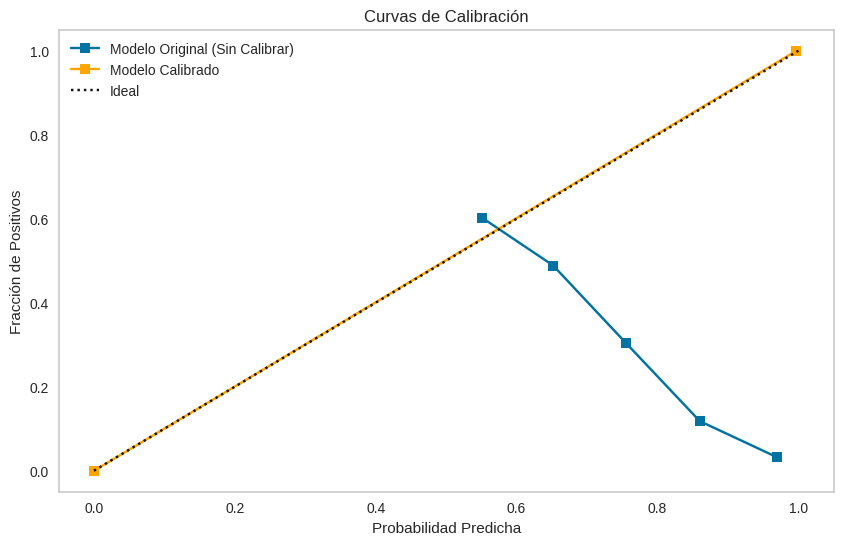

In [29]:
#2
# Calcular las curvas de calibración
probabilities_original = predict_model(xgb_model2, data=df)['prediction_score']
probabilities_calibrated = calibrated_model.predict_proba(X)[:, 1]

# Generar las curvas de calibración
fraction_of_positives_original, mean_predicted_value_original = calibration_curve(df['label'], probabilities_original, n_bins=10)
fraction_of_positives_calibrated, mean_predicted_value_calibrated = calibration_curve(df['label'], probabilities_calibrated, n_bins=10)

# Visualizar las curvas de calibración
plt.figure(figsize=(10, 6))
plt.plot(mean_predicted_value_original, fraction_of_positives_original, 's-', label='Modelo Original (Sin Calibrar)')
plt.plot(mean_predicted_value_calibrated, fraction_of_positives_calibrated, 's-', label='Modelo Calibrado', color='orange')

# Diagonal ideal
plt.plot([0, 1], [0, 1], 'k:', label='Ideal')

# Configurar el gráfico
plt.title('Curvas de Calibración')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Fracción de Positivos')
plt.legend()
plt.grid()
plt.show()


Se puede observar que el Brier Score mejora al realizar la calibración. Además, de manera inusual se puede ver que la aplicación de la calibración produce probabilidades perfectamente calibradas.